# Intro
Trong bài này chúng ta sẽ tìm hiểu về tập dữ liệu CIFAR-10. Sau đó, ta sẽ xây dựng mô hình CNN trên nó.

CIFAR-10 gồm 50,000 images train và 10,000 images test, với 10 classes.

In [1]:
# Import Library
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
import math
import os
from datetime import timedelta

In [6]:
# Load dataset
import cifar10
cifar10.maybe_download_and_extract()
class_names = cifar10.load_class_names()
class_names

- Download progress: 100.0%
Download finished. Extracting files.
Done.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [11]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [13]:
from cifar10 import img_size, num_channels, num_classes

In [18]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'
            
        ax.imshow(images[i, :, :, :], interpolation = interpolation)
        
        cls_true_name = class_names[cls_true[i]]
        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            cls_pred_name = class_names[cls_pred[i]]
            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

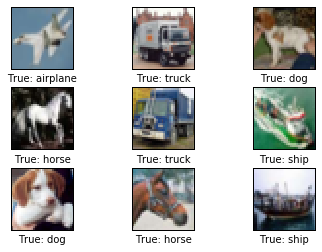

In [20]:
# Get the first images from the test-set.
images = images_test[10:19]

# Get the true classes for those images.
cls_true = cls_test[10:19]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)
    


# CNN

Xây dựng mô hình CNN để phân tích tập dữ liệu này

In [22]:
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

img_size_cropped = 24 # change size image input from 32 to 24 pixel

Instructions for updating:
Use the `axis` argument instead


Instructions for updating:
Use the `axis` argument instead


In [21]:
def pre_process_image(image, training):
    if training:
        image = tf.random_crop(image, size=[img_size_cropped, img_size_cropped, num_channels])
        image = tf.image.random_flip_left_right(image)

        image = tf.image.random_hue(image, max_delta=0.05)
        image = tf.image.random_contrast(image, lower=0.3, upper=1.0)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_saturation(image, lower=0.0, upper=2.0)

        image = tf.minimum(image, 1.0)
        image = tf.maximum(image, 0.0)
    else:
        image = tf.image.resize_image_with_crop_or_pad(image,
                                                       target_height=img_size_cropped,
                                                       target_width=img_size_cropped)

    return image

In [23]:
def pre_process(images, training):
    images = tf.map_fn(lambda image: pre_process_image(image, training), images)
    return images

In [24]:
distorted_images = pre_process(images=x, training=True)

In [ ]:
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)
